# Water Potability Classification Models

This is the notebook for creating a water potability classification models, based on the water quality dataset from kaggle.

<hr></hr>

Water Quality Metrics (x values):
- pH value
- Hardness
- Solids (Total dissolved solids)
- Chloramines
- Sulfate
- Conductivity
- Organic Carbon
- Trihalomethanes
- Turbidity

Water Quality Indicator (y value):
- Potability

<hr></hr>

Classification models:
- Decision Tree
- Random Forest
- K-Nearest Neighbors
- Logistic Regression
- Naive Bayes
- SVM

<hr></hr>

Kaggle Link: https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download

Copied to Github: https://raw.githubusercontent.com/cmosqueda/ml-compilations/refs/heads/main/datasets/water_potability.csv

In [7]:
# initialize libraries to use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import missingno as msno

In [8]:
# read dataset from github

df = pd.read_csv('https://raw.githubusercontent.com/cmosqueda/ml-compilations/refs/heads/main/datasets/water_potability.csv')

print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


Count dataframe column values

In [9]:
print(df.count())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64


Count all missing values

In [10]:
print(df.isna().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Describe dataframe

In [11]:
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


Visualize missing data

<Axes: >

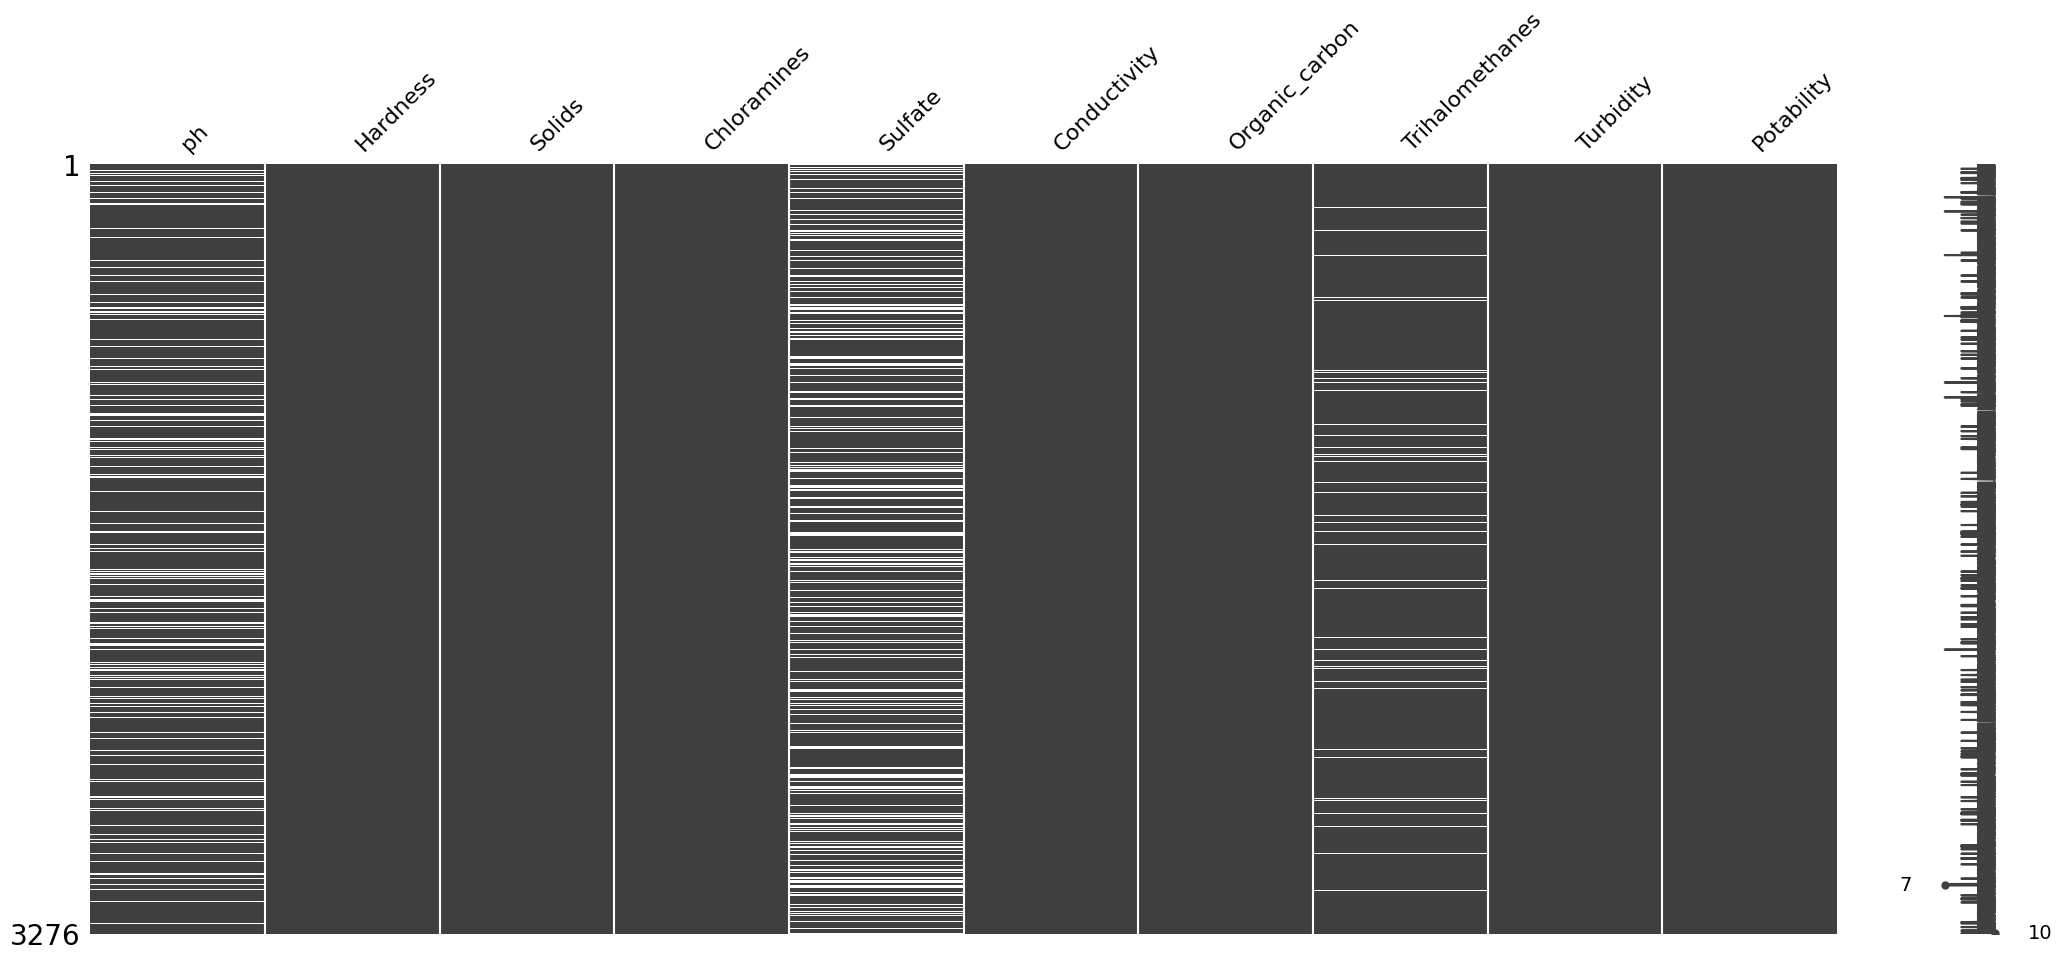

In [12]:
msno.matrix(df)

Detect outliers using boxplot, z-score, and IQR method

boxplot


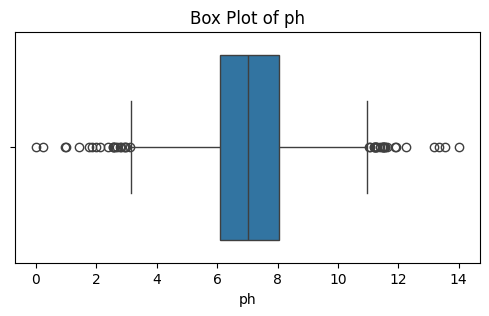

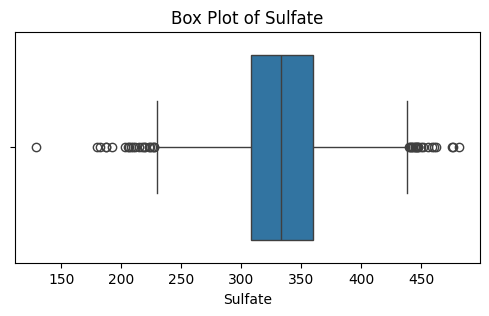

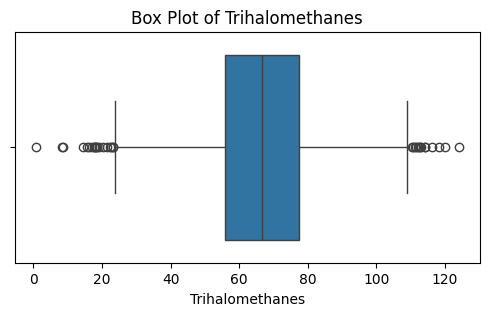

z-score
ph - Outliers Detected: 16
Sulfate - Outliers Detected: 17
Trihalomethanes - Outliers Detected: 12


IQR
ph - Outliers Detected: 46
Sulfate - Outliers Detected: 41
Trihalomethanes - Outliers Detected: 33


In [14]:
# for boxplot
cols_with_nans = ['ph', 'Sulfate', 'Trihalomethanes']
print('boxplot')
for col in cols_with_nans:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


# for z-score
# Z-score threshold
threshold = 3
print('z-score')
for col in cols_with_nans:
    z_scores = np.abs(zscore(df[col].dropna()))  # dropna to avoid issues
    outliers = np.where(z_scores > threshold)[0]
    print(f"{col} - Outliers Detected: {len(outliers)}")


print('\n')

# for IQR method
print('IQR')
for col in cols_with_nans:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} - Outliers Detected: {len(outliers)}")

Fill in missing values using imputation

In [15]:
df['ph'] = df['ph'].fillna(df.groupby('Potability')['ph'].transform('mean'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby('Potability')['Sulfate'].transform('mean'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby('Potability')['Trihalomethanes'].transform('mean'))

Display current missing values 

In [16]:
print(df.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


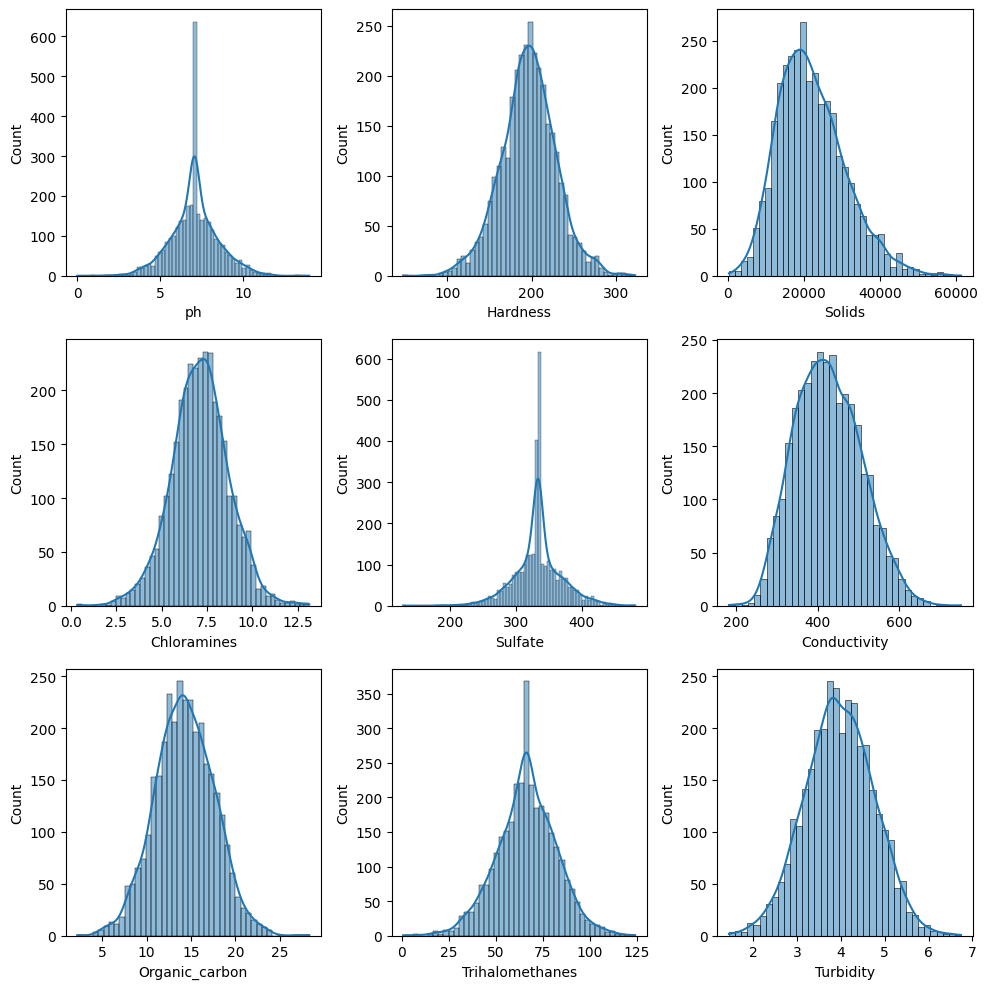

In [17]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in df.columns[:9]:
    ax=plt.subplot(3,3,plotnumber)
    sns.histplot(df[column],kde=True)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Potability', ylabel='count'>

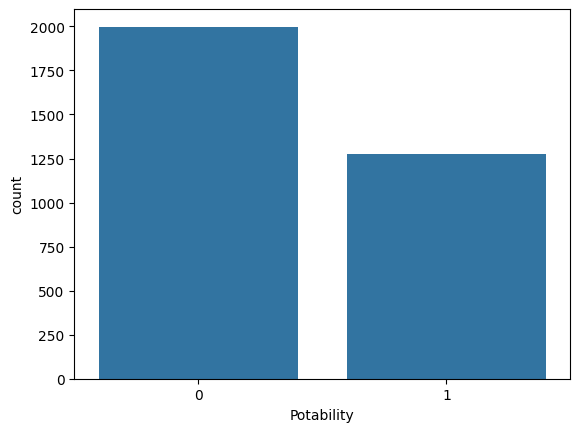

In [18]:
sns.countplot(x='Potability', data=df)

Boxplot for every column (missing data now filled in)

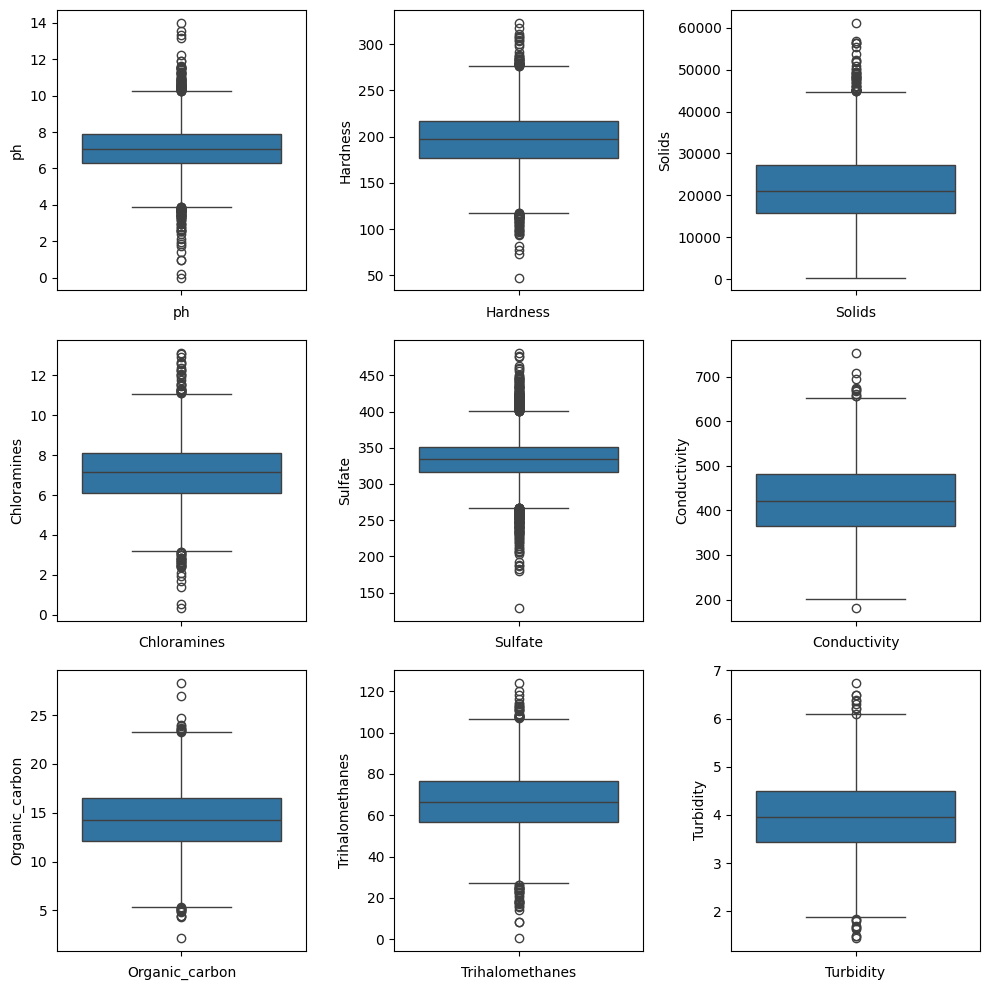

In [19]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in df.columns[:9]:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

Pairplot for potability

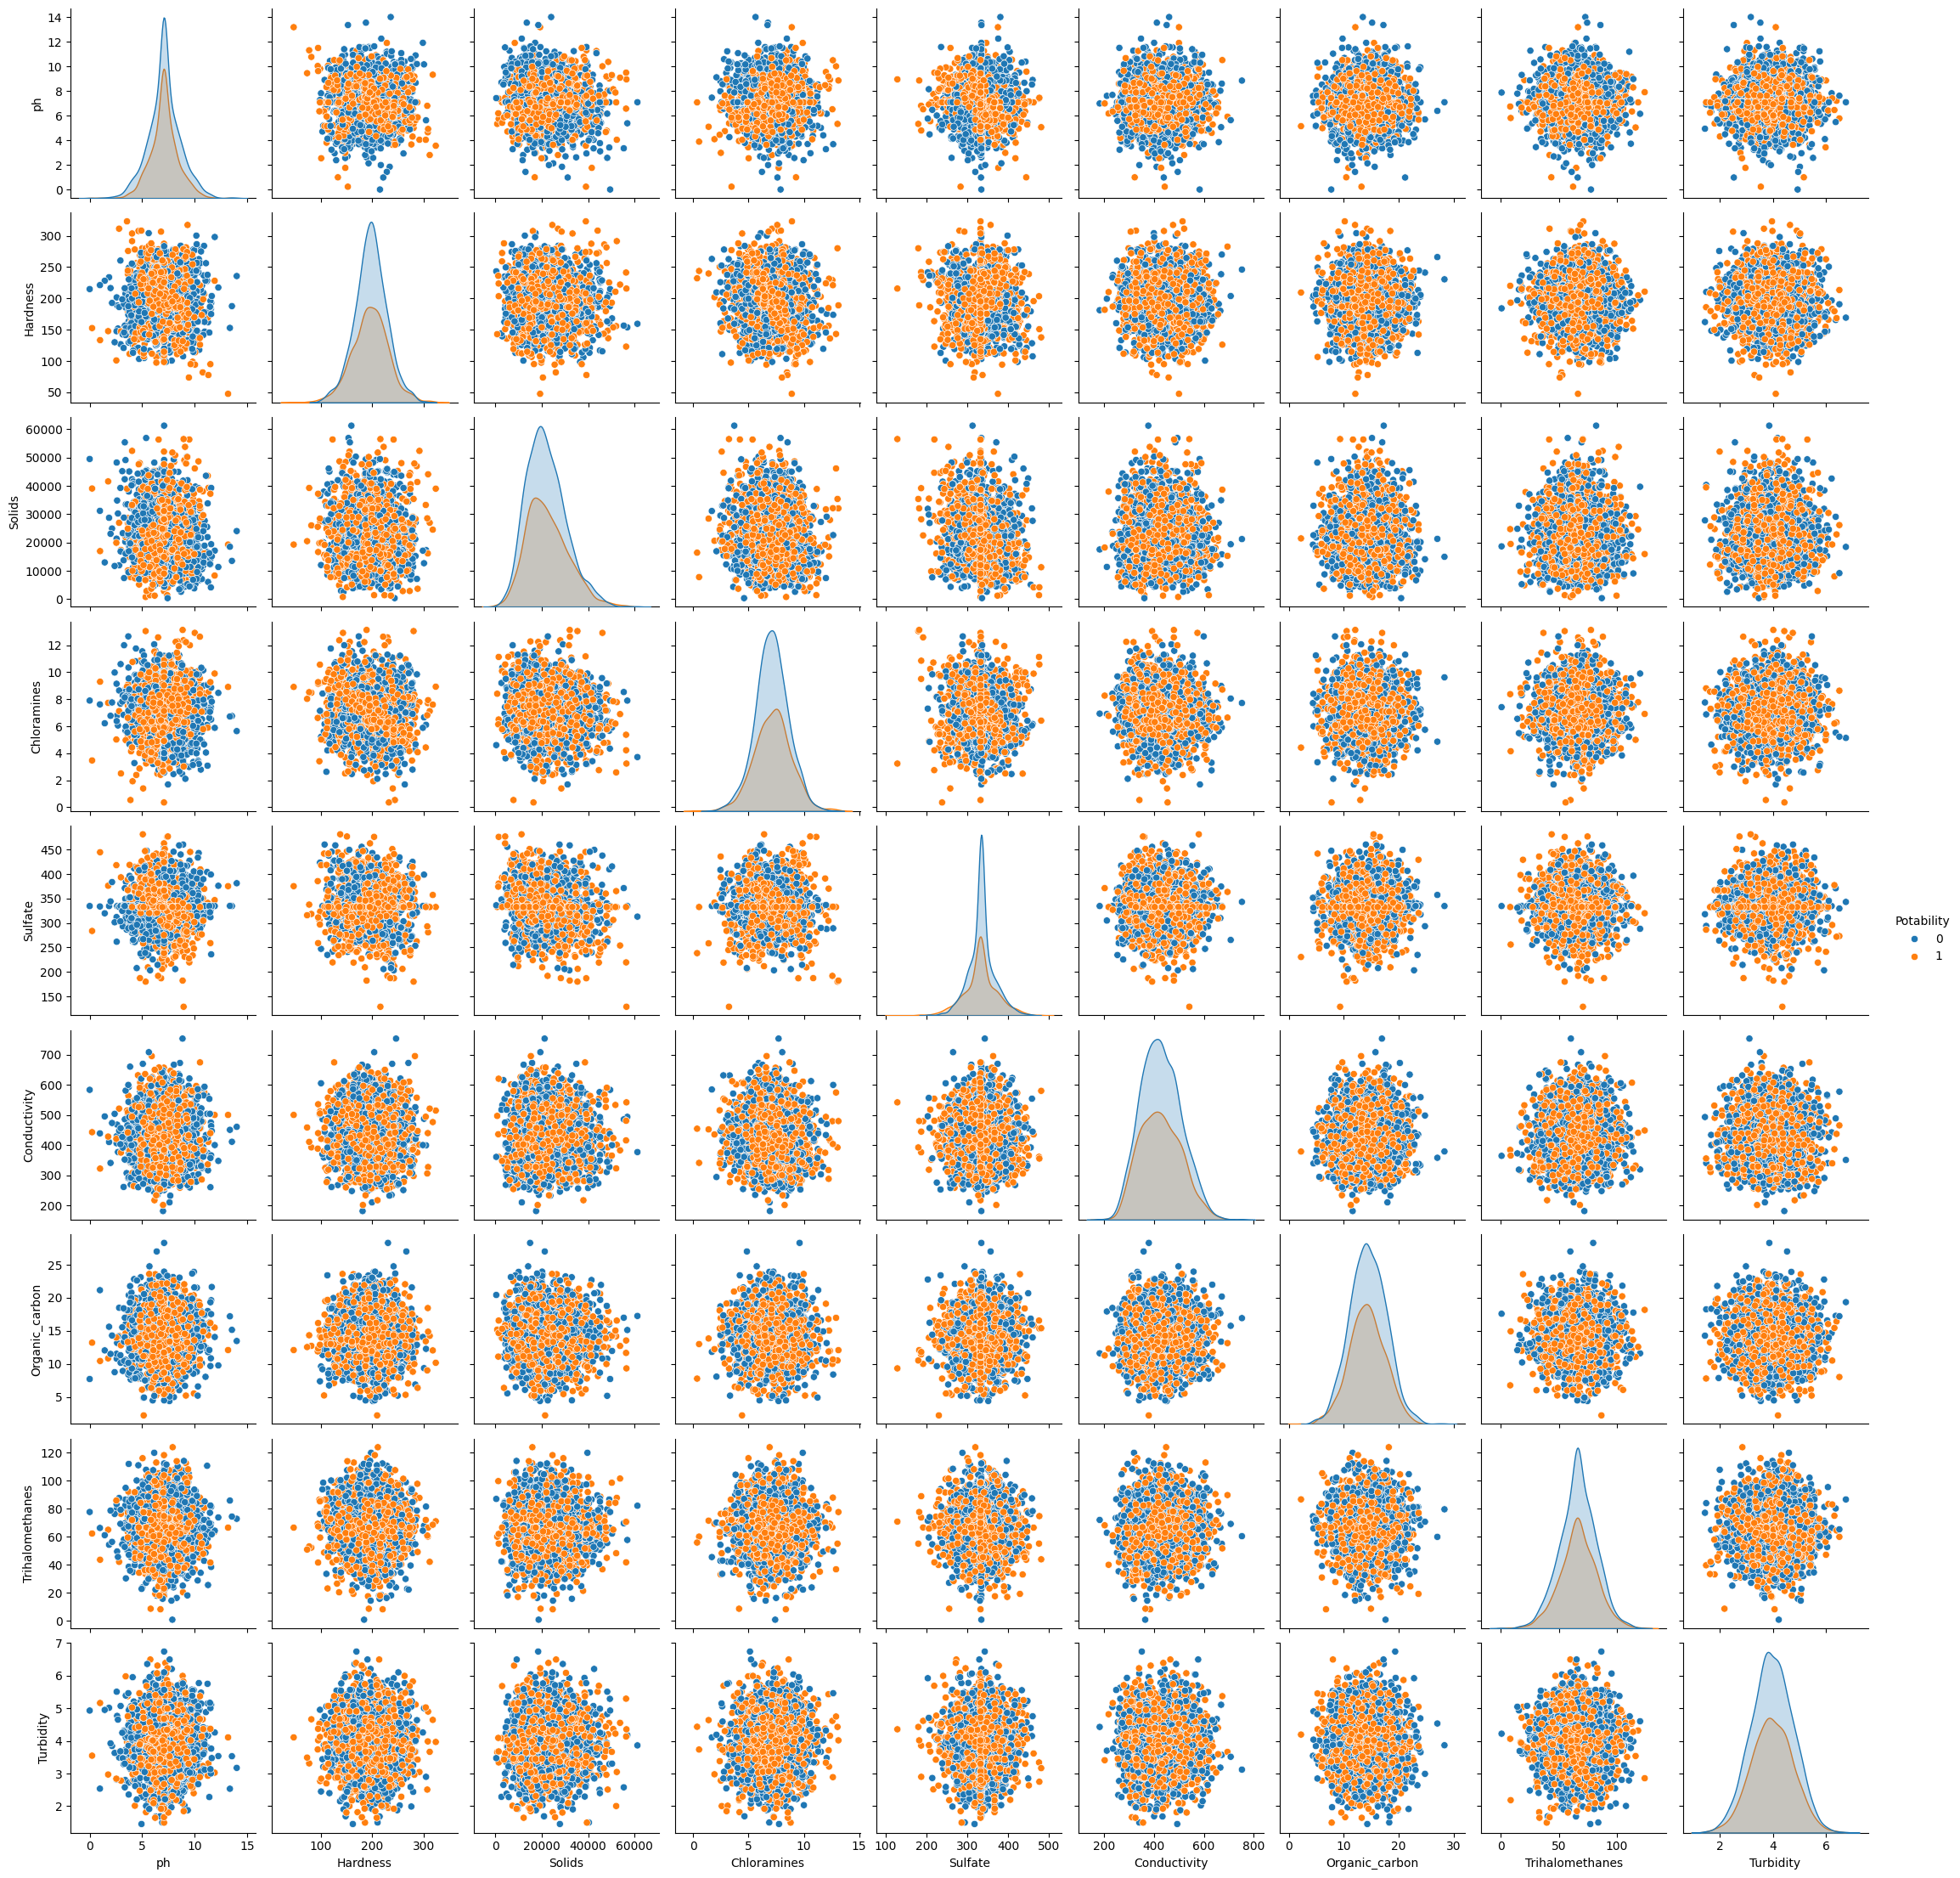

In [20]:
sns.pairplot(df, hue='Potability')

Set other columns as x, Potability as y

In [24]:
x = df.drop(['Potability'],axis=1)
print(x)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [25]:
y = df[['Potability']]
print(y)

      Potability
0              0
1              0
2              0
3              0
4              0
...          ...
3271           1
3272           1
3273           1
3274           1
3275           1

[3276 rows x 1 columns]


Split dataset using hold out set 80/20

In [31]:
# Split dataset into train and test sets
trainX, testX, trainY, testY = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(trainX, trainY)

# Optional: Check class distribution
print("Before SMOTE:\n", trainY.value_counts())
print("After SMOTE:\n", pd.Series(y_train_resampled.values.ravel()).value_counts())

Before SMOTE:
 Potability
0             1598
1             1022
Name: count, dtype: int64
After SMOTE:
 0    1598
1    1598
Name: count, dtype: int64


In [32]:
# Fix y shape if needed
if isinstance(y_train_resampled, (pd.DataFrame, pd.Series)):
    y_train_resampled = y_train_resampled.values.ravel()

# Scale the features (fit only once on training data)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(testX)

# Ensure test data is also a NumPy array
X_train_resampled = np.array(X_train_resampled)
X_test = np.array(X_test)

Train following models:
- Decision Tree
- Random Forest
- KNN
- Logistic Regression
- Naive Bayes
- SVM

In [33]:
# define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN':KNeighborsClassifier(n_neighbors=2),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear')
}

In [36]:
# Evaluation loop
accuracy_results = []

for model_name, model in models.items():
    print(f"--- {model_name} ---")

    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict
    y_predicted = model.predict(X_test)

    # Check unique predicted classes
    print("Unique Predictions:", np.unique(y_predicted))

    # Confusion matrix
    cm = confusion_matrix(testY, y_predicted, labels=[1, 0])
    print("Confusion Matrix:")
    print(cm)

    # Avoid ValueError if matrix is not 2x2
    if cm.shape == (2, 2):
        tp, fn, fp, tn = cm.ravel()
    else:
        tp = fn = fp = tn = 0

    # Metrics
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    acc_score = accuracy_score(testY, y_predicted) * 100
    class_report = classification_report(testY, y_predicted)

    # Print results
    print(f"Precision       : {precision:.4f}")
    print(f"Recall          : {recall:.4f}")
    print(f"Specificity     : {specificity:.4f}")
    print(f"Harmonic Mean(F1): {f1:.4f}")
    print()

    accuracy_results.append({'Model': model_name, 'Accuracy': acc_score})

score_df = pd.DataFrame(accuracy_results)


--- Decision Tree ---
Unique Predictions: [0 1]
Confusion Matrix:
[[172  84]
 [101 299]]
Precision       : 0.6300
Recall          : 0.6719
Specificity     : 0.7475
Harmonic Mean(F1): 0.6503

--- Random Forest ---
Unique Predictions: [0 1]
Confusion Matrix:
[[197  59]
 [ 91 309]]
Precision       : 0.6840
Recall          : 0.7695
Specificity     : 0.7725
Harmonic Mean(F1): 0.7243

--- KNN ---
Unique Predictions: [0 1]
Confusion Matrix:
[[ 71 185]
 [ 82 318]]
Precision       : 0.4641
Recall          : 0.2773
Specificity     : 0.7950
Harmonic Mean(F1): 0.3472

--- Logistic Regression ---
Unique Predictions: [0 1]
Confusion Matrix:
[[129 127]
 [184 216]]
Precision       : 0.4121
Recall          : 0.5039
Specificity     : 0.5400
Harmonic Mean(F1): 0.4534

--- Naive Bayes ---
Unique Predictions: [0 1]
Confusion Matrix:
[[128 128]
 [146 254]]
Precision       : 0.4672
Recall          : 0.5000
Specificity     : 0.6350
Harmonic Mean(F1): 0.4830

--- SVM ---
Unique Predictions: [0 1]
Confusion Mat

Print accuracy summary result of every trained model 

In [42]:
print(score_df)

                 Model   Accuracy
0        Decision Tree  71.798780
1        Random Forest  77.134146
2                  KNN  59.298780
3  Logistic Regression  52.591463
4          Naive Bayes  58.231707
5                  SVM  57.164634


or Visualize accuracy summary result

<Axes: xlabel='Accuracy', ylabel='Model'>

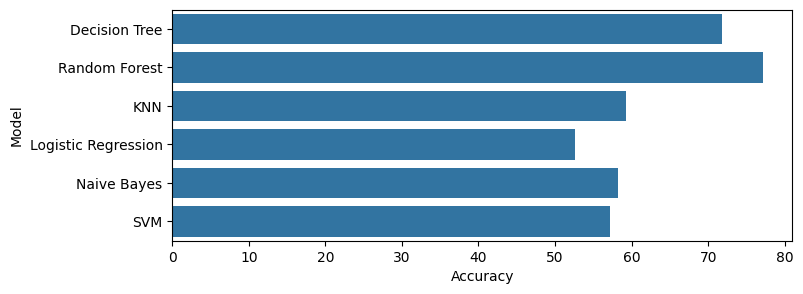

In [43]:
plt.figure(figsize=(8,3))
sns.barplot(x='Accuracy', y='Model', data=score_df)

## Conclusion

The evaluation for each trained models tried shows that Random Forest, gaining the highest accuracy rate of 77.13%, offers the best fit training model for this Water Potability dataset.